#load data

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("sales_data_with_discounts.csv")

In [3]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
df.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


In [7]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [11]:
df.shape

(450, 13)

#Descriptive Analytics for Numerical Columns

In [23]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols


Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [79]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [81]:
# Calculate mean, median, mode, and standard deviation for each numerical column
for col in num_cols:
  print(f"Statistics for column: {col}")
  print(f"Mean: {df[col].mean()}")
  print(f"Median: {df[col].median()}")
  print(f"Mode: {df[col].mode()[0]}") # Access the first mode value
  print(f"Standard Deviation: {df[col].std()}")
  print("<->" * 20)

Statistics for column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926
<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><->
Statistics for column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645
<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><->
Statistics for column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328
<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><->
Statistics for column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511
<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><->
Statistics for column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985
<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><->
Statistics for column: Net

In [77]:
df['Volume'].mean()

5.066666666666666

In [87]:
def interpret_statistics(df, col):
    """
    Interprets descriptive statistics for a numerical column.
    """
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std_dev = df[col].std()

    print(f"Interpretation for {col}:")
    print(f"- Mean: {mean:.2f}")
    print(f"- Median: {median:.2f}")
    print(f"- Mode: {mode}")
    print(f"- Standard Deviation: {std_dev:.2f}")

    # Comparing Mean and Median to check for skewness
    if mean > median:
        print("The data is likely right-skewed (positively skewed).")
    elif mean < median:
        print("The data is likely left-skewed (negatively skewed).")
    else:
        print("The data is likely symmetrically distributed.")

    print("<->" * 20)

# Loop through each numerical column in the DataFrame
for col in num_cols:
    interpret_statistics(df, col)
    

Interpretation for Volume:
- Mean: 5.07
- Median: 4.00
- Mode: 3
- Standard Deviation: 4.23
The data is likely right-skewed (positively skewed).
<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><->
Interpretation for Avg Price:
- Mean: 10453.43
- Median: 1450.00
- Mode: 400
- Standard Deviation: 18079.90
The data is likely right-skewed (positively skewed).
<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><->
Interpretation for Total Sales Value:
- Mean: 33812.84
- Median: 5700.00
- Mode: 24300
- Standard Deviation: 50535.07
The data is likely right-skewed (positively skewed).
<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><->
Interpretation for Discount Rate (%):
- Mean: 15.16
- Median: 16.58
- Mode: 5.007822189204133
- Standard Deviation: 4.22
The data is likely left-skewed (negatively skewed).
<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><->
Interpretation for Discount Amount:
- Mean: 3346.50
- Median: 988.93
- Mode: 69.17794228822787
- Standard 

#Data Visualization

Analysis of Volume:
The distribution appears to be significantly right-skewed.
Potential outliers detected.


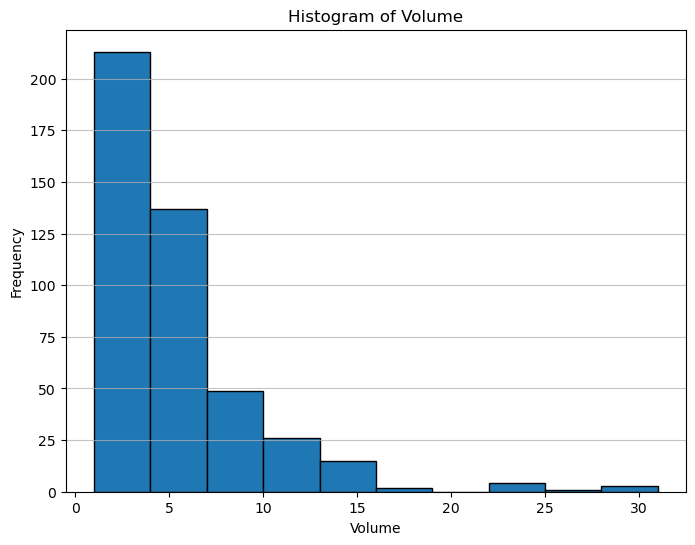

Analysis of Avg Price:
The distribution appears to be significantly right-skewed.
Potential outliers detected.


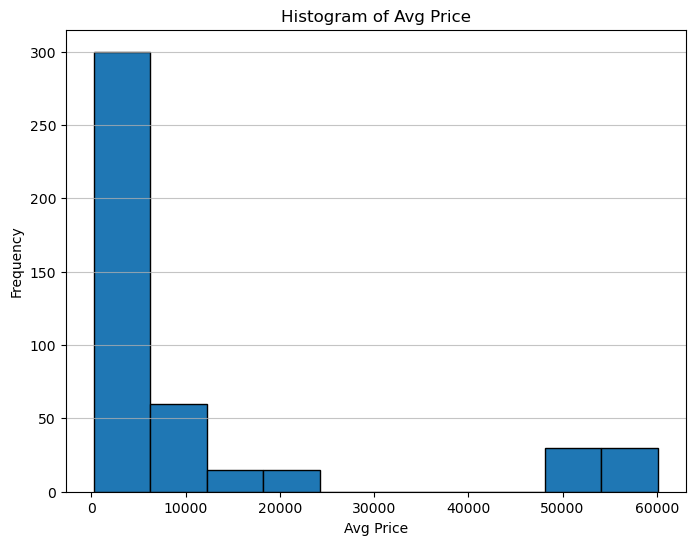

Analysis of Total Sales Value:
The distribution appears to be significantly right-skewed.
Potential outliers detected.


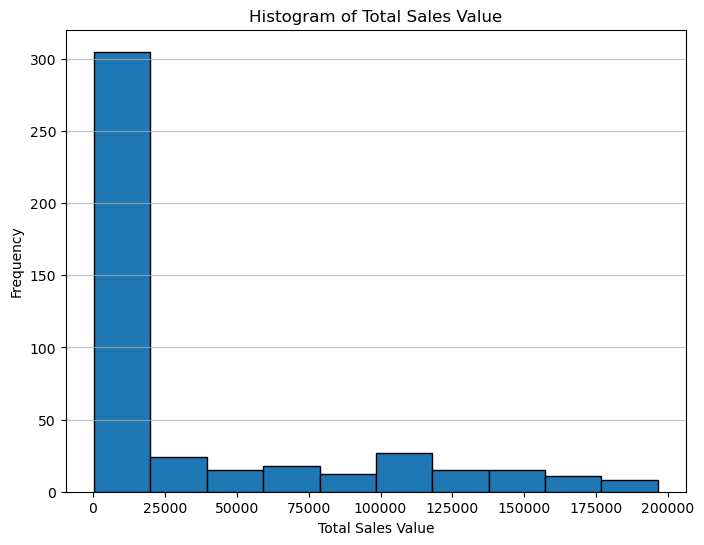

Analysis of Discount Rate (%):
The distribution appears to be significantly left-skewed.
Potential outliers detected.


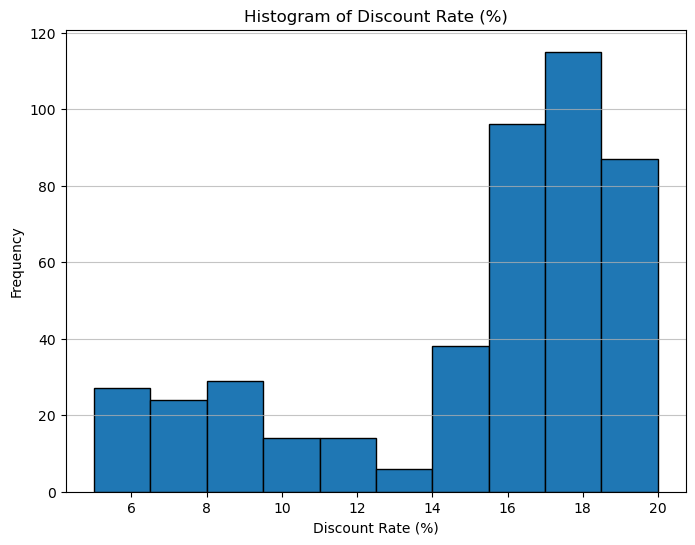

Analysis of Discount Amount:
The distribution appears to be significantly right-skewed.
Potential outliers detected.


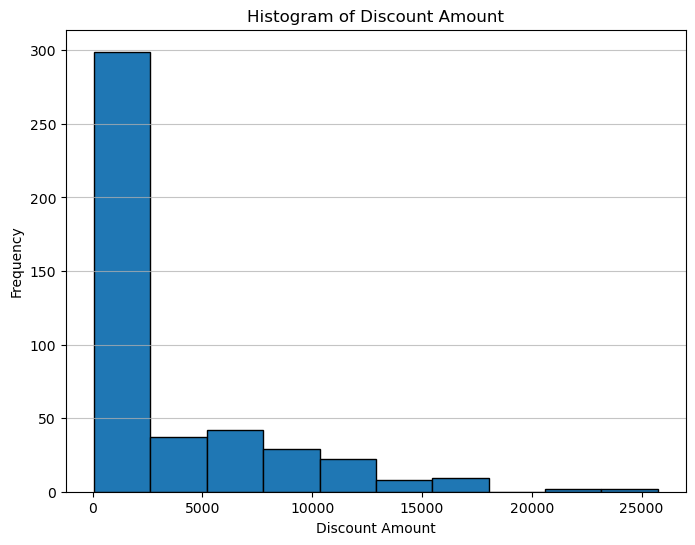

Analysis of Net Sales Value:
The distribution appears to be significantly right-skewed.
Potential outliers detected.


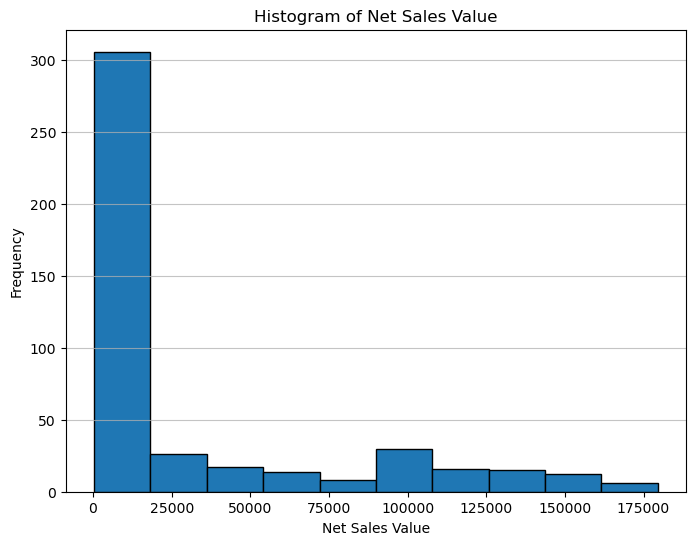

In [93]:
# prompt: Plot histograms for each numerical column and  Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences on above df

import matplotlib.pyplot as plt

# Assuming df and num_cols are defined from previous code cells

for col in num_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(df[col], bins=10, edgecolor='k')  # Customize bins and edgecolor
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)  # Add a grid for better readability

    # Analyze skewness and outliers (basic visual inspection)
    print(f"Analysis of {col}:")
    if df[col].skew() > 0.5:
        print("The distribution appears to be significantly right-skewed.")
    elif df[col].skew() < -0.5:
        print("The distribution appears to be significantly left-skewed.")
    else:
        print("The distribution seems relatively symmetrical.")

    # Basic outlier detection using IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
      print("Potential outliers detected.")
    else:
      print("No outliers detected using the IQR method.")

    plt.show()

Potential outliers detected in Volume:
0      15
10     13
30     11
40     29
50     13
70     24
71     14
80     12
100    25
101    15
102    11
130    15
140    14
161    12
170    12
180    12
190    22
192    11
193    11
200    12
201    12
210    14
221    11
222    11
240    15
250    31
251    12
260    16
280    24
281    11
282    12
300    12
310    22
312    11
320    13
340    15
350    12
370    14
371    14
390    11
400    29
410    15
420    13
431    17
Name: Volume, dtype: int64
Interquartile Range (IQR) for Volume: 3.0


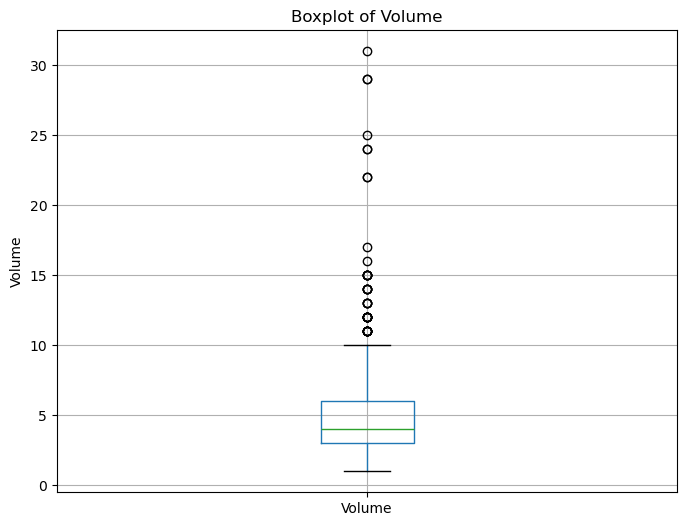

Potential outliers detected in Avg Price:
6      49100
7      54100
8      55100
9      60100
36     49100
37     54100
38     55100
39     60100
66     49100
67     54100
68     55100
69     60100
96     49100
97     54100
98     55100
99     60100
126    49100
127    54100
128    55100
129    60100
156    49100
157    54100
158    55100
159    60100
186    49100
187    54100
188    55100
189    60100
216    49100
217    54100
218    55100
219    60100
246    49100
247    54100
248    55100
249    60100
276    49100
277    54100
278    55100
279    60100
306    49100
307    54100
308    55100
309    60100
336    49100
337    54100
338    55100
339    60100
366    49100
367    54100
368    55100
369    60100
396    49100
397    54100
398    55100
399    60100
426    49100
427    54100
428    55100
429    60100
Name: Avg Price, dtype: int64
Interquartile Range (IQR) for Avg Price: 9635.0


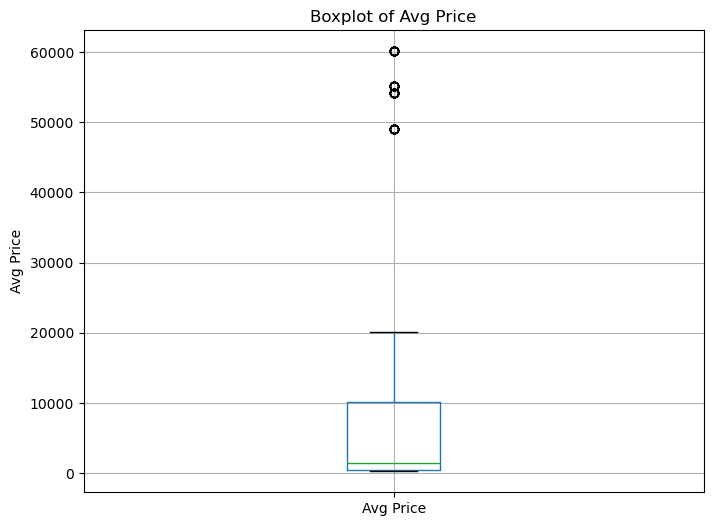

Potential outliers detected in Total Sales Value:
0      181500
6      147300
9      180300
30     133100
36     147300
38     165300
39     180300
66     196400
96     147300
126    147300
127    162300
157    162300
180    145200
186    147300
187    162300
188    165300
189    180300
210    169400
216    147300
240    181500
243    140700
246    147300
278    165300
300    145200
306    147300
308    165300
309    180300
338    165300
339    180300
363    140700
366    147300
390    133100
396    147300
420    157300
426    147300
428    165300
Name: Total Sales Value, dtype: int64
Interquartile Range (IQR) for Total Sales Value: 50500.0


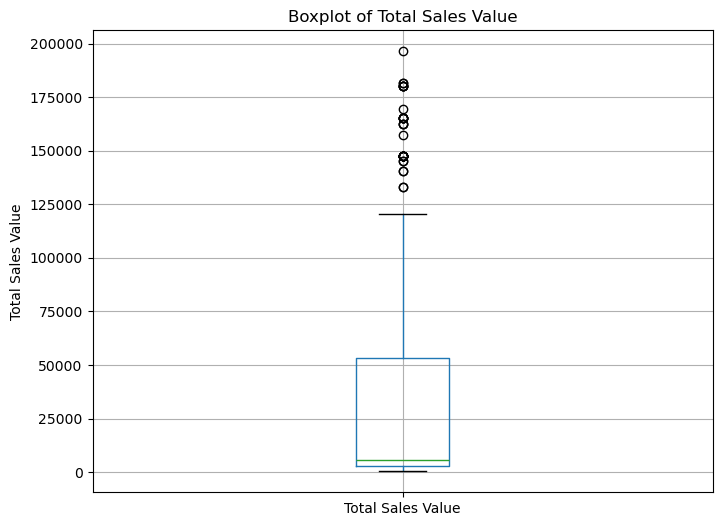

Potential outliers detected in Discount Rate (%):
3      6.935385
7      5.553719
8      7.410104
33     6.214888
36     5.252113
67     7.621791
69     5.007822
93     5.870671
98     6.710454
99     6.095201
127    5.935084
128    7.584591
152    7.732667
153    7.233847
156    5.420507
157    6.849976
159    7.256696
187    7.178726
212    7.679386
213    5.794802
218    5.059801
242    6.858255
243    7.208363
246    7.341874
248    6.473305
249    6.439920
273    7.421326
278    6.268914
279    6.819111
302    6.170398
303    5.072124
307    6.106931
308    6.508719
336    6.066192
338    5.084108
368    6.326892
393    6.415230
397    5.055218
398    5.411802
399    5.511042
422    5.485157
423    5.466379
426    6.008200
427    6.642595
428    5.425911
Name: Discount Rate (%), dtype: float64
Interquartile Range (IQR) for Discount Rate (%): 4.149655934050962


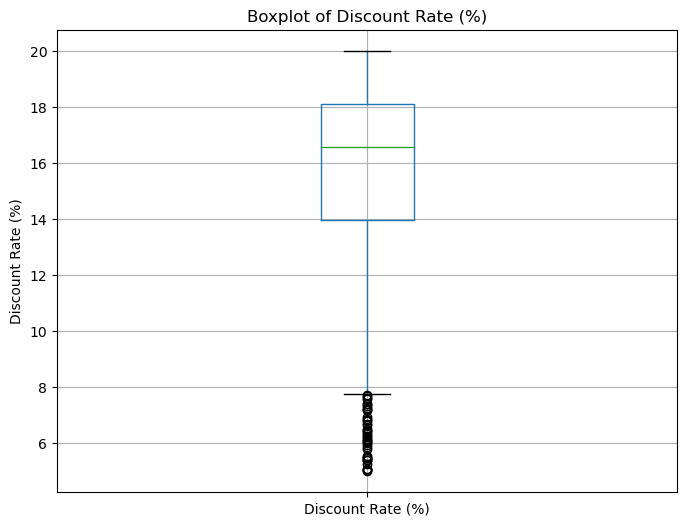

Potential outliers detected in Discount Amount:
0      21153.498820
6      13594.039719
9      17900.983733
30     17445.603828
38     13951.660194
39     16384.029009
66     16892.520951
90     15214.643324
96     12622.503658
180    17178.331859
186    12753.565958
188    13999.938499
189    17696.813621
210    25328.224204
216    13608.238319
240    25738.022194
300    21496.675367
309    16332.919930
339    14036.838652
363    12734.009012
366    13275.780741
390    16218.594720
396    13382.227333
420    15984.732281
Name: Discount Amount, dtype: float64
Interquartile Range (IQR) for Discount Amount: 4856.03612280112


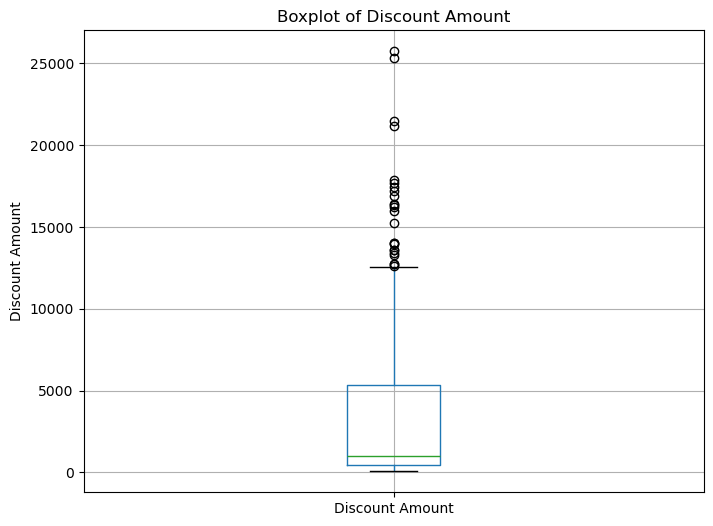

Potential outliers detected in Net Sales Value:
0      160346.501180
6      133705.960281
9      162399.016267
36     139563.638215
38     151348.339806
39     163915.971000
66     179507.479049
96     134677.496342
126    134731.954625
127    152667.358354
157    151182.489533
180    128021.668141
186    134546.434042
187    150648.927866
188    151300.061501
189    162603.186379
210    144071.775796
216    133691.761681
240    155761.977806
243    130557.833327
246    136485.419091
278    154937.485475
300    123703.324633
306    134934.946692
308    154541.087365
309    163967.080070
338    156895.968772
339    166263.161348
363    127965.990988
366    134024.219259
390    116881.405280
396    133917.772667
420    141315.267719
426    138449.922039
428    156330.969890
Name: Net Sales Value, dtype: float64
Interquartile Range (IQR) for Net Sales Value: 45645.70420627015


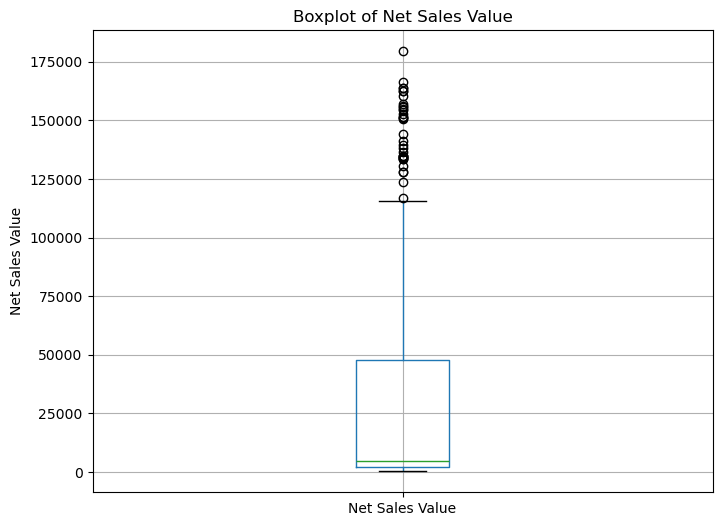

In [97]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    # Analyze outliers and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Potential outliers detected in {col}:")
        print(outliers[col])
    else:
        print(f"No outliers detected in {col} using the IQR method.")
    print(f"Interquartile Range (IQR) for {col}: {IQR}")
    plt.show()

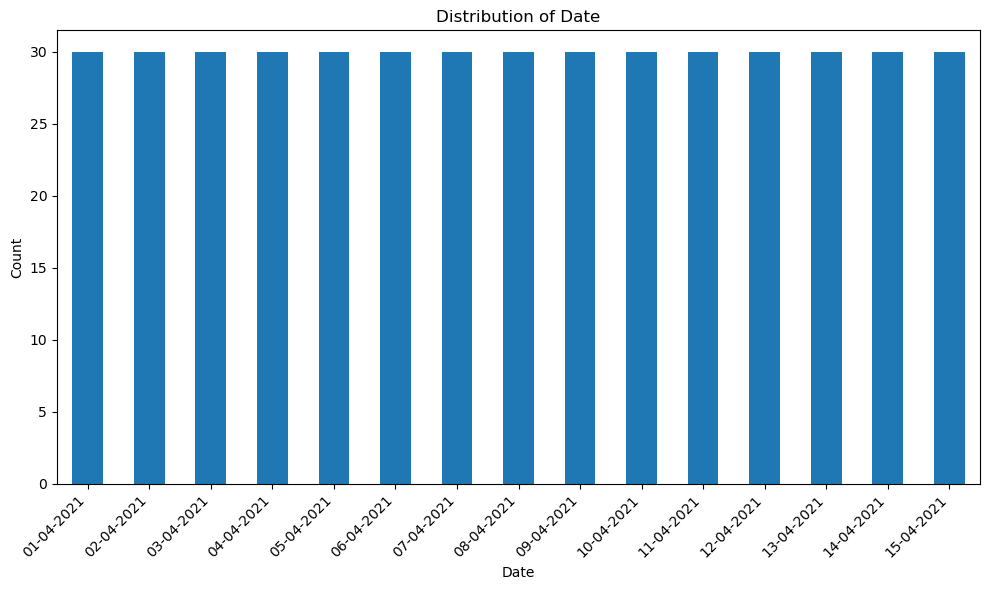

Analysis of Date:
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64
The most frequent category is: 01-04-2021


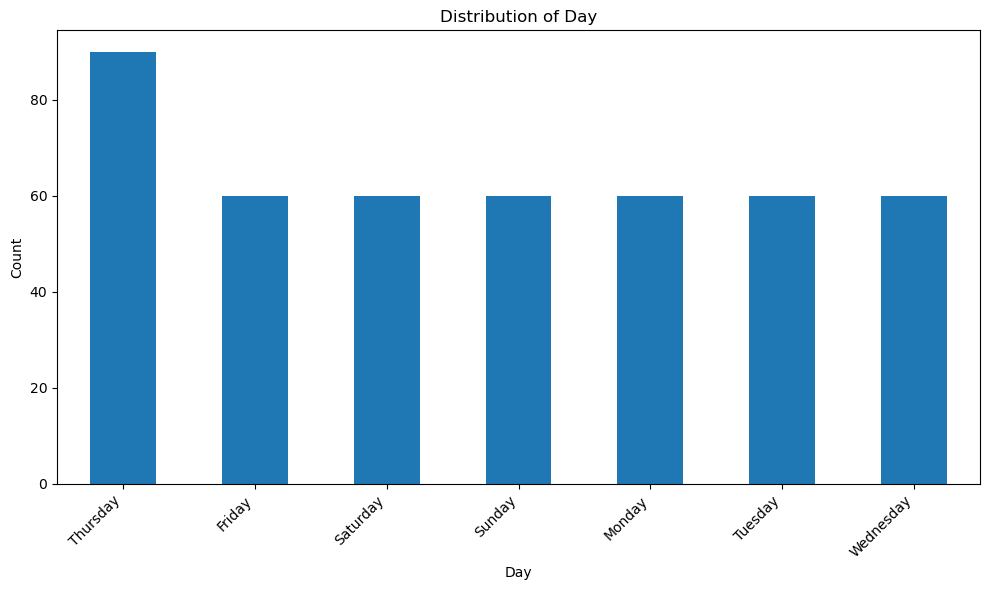

Analysis of Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64
The most frequent category is: Thursday


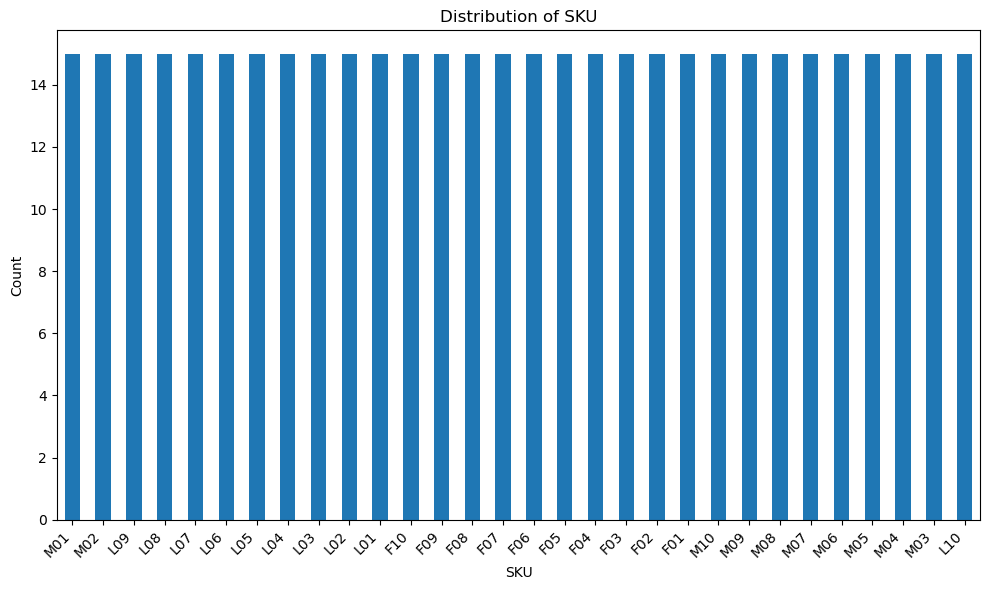

Analysis of SKU:
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64
The most frequent category is: M01


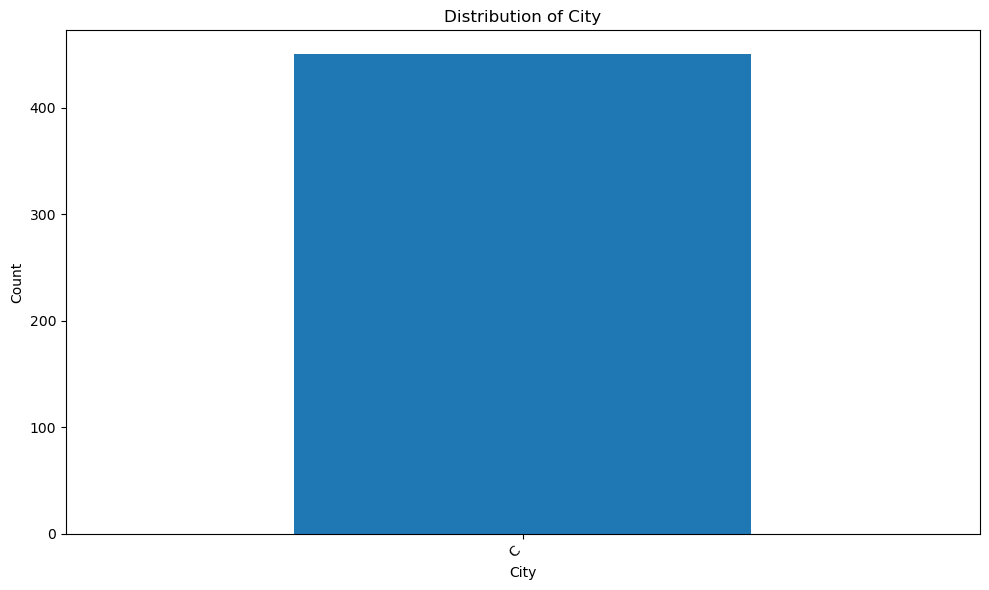

Analysis of City:
City
C    450
Name: count, dtype: int64
The most frequent category is: C


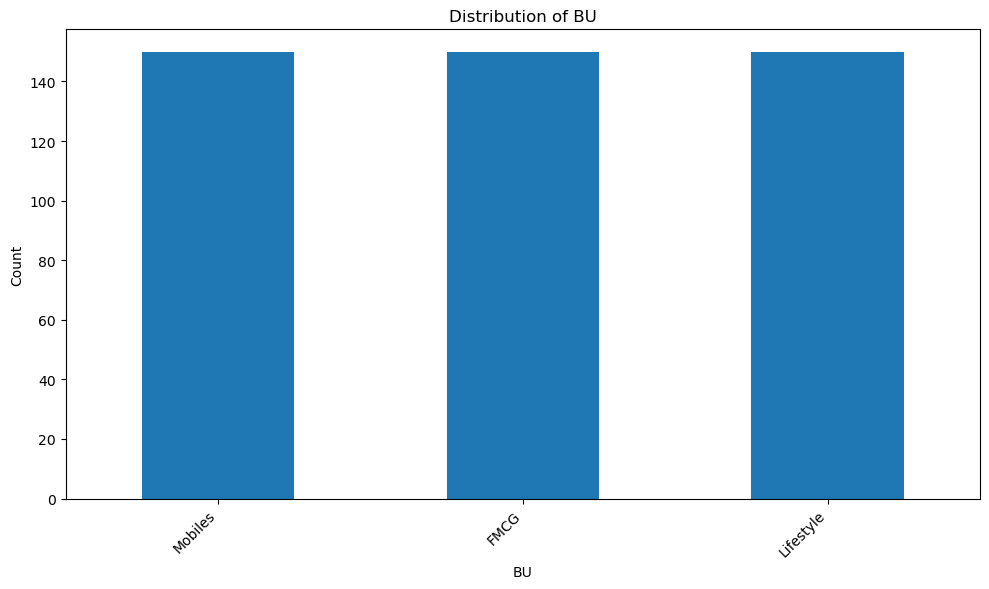

Analysis of BU:
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64
The most frequent category is: Mobiles


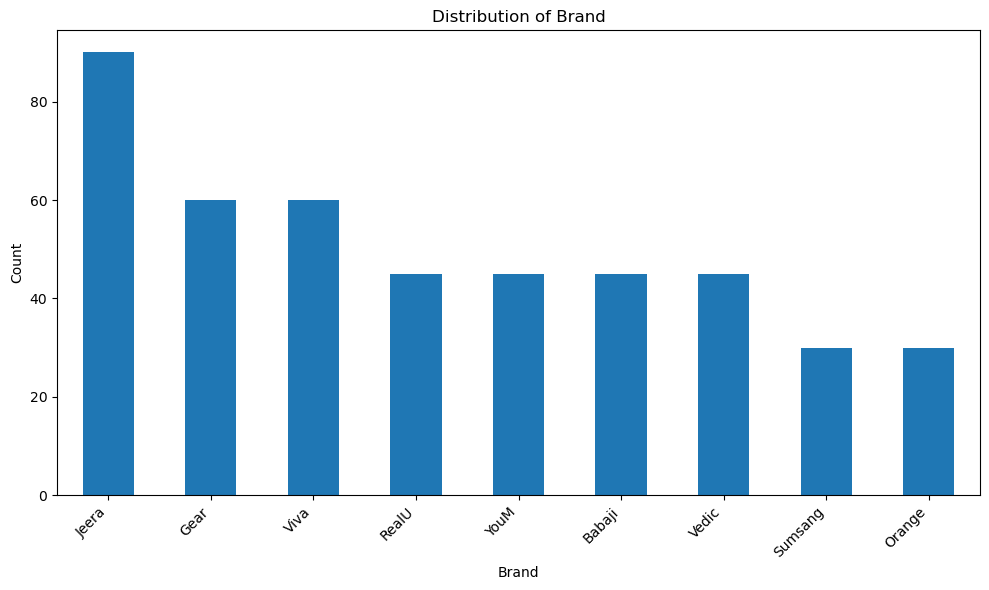

Analysis of Brand:
Brand
Jeera      90
Gear       60
Viva       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Sumsang    30
Orange     30
Name: count, dtype: int64
The most frequent category is: Jeera


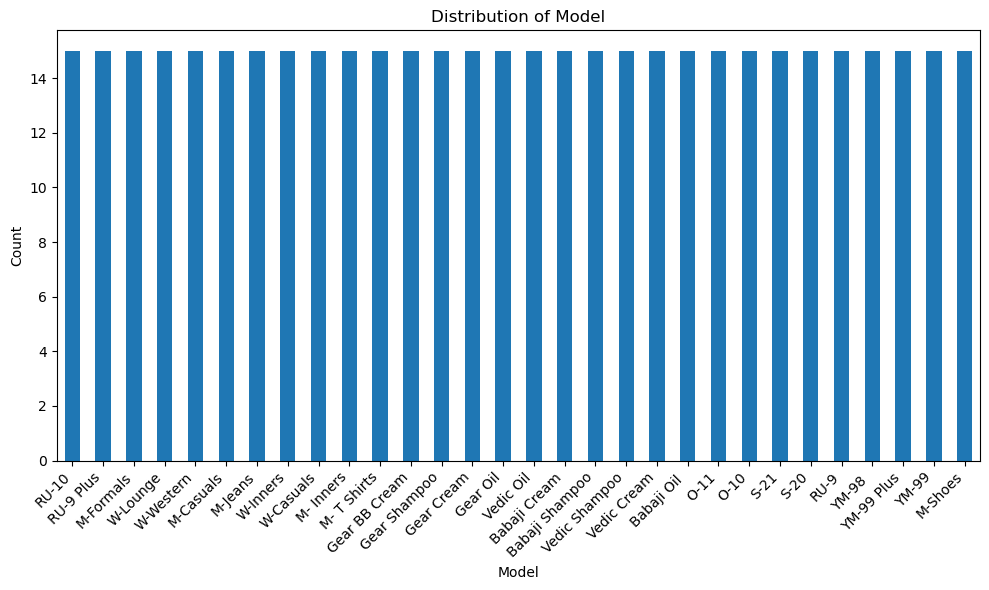

Analysis of Model:
Model
RU-10             15
RU-9 Plus         15
M-Formals         15
W-Lounge          15
W-Western         15
M-Casuals         15
M-Jeans           15
W-Inners          15
W-Casuals         15
M- Inners         15
M- T Shirts       15
Gear BB Cream     15
Gear Shampoo      15
Gear Cream        15
Gear Oil          15
Vedic Oil         15
Babaji Cream      15
Babaji Shampoo    15
Vedic Shampoo     15
Vedic Cream       15
Babaji Oil        15
O-11              15
O-10              15
S-21              15
S-20              15
RU-9              15
YM-98             15
YM-99 Plus        15
YM-99             15
M-Shoes           15
Name: count, dtype: int64
The most frequent category is: RU-10


In [99]:
# prompt: Identify categorical columns in the dataset.
# Create bar charts to visualize the frequency or count of each category.
# Analyze the distribution of categories and provide insights.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame (loaded from market_3.csv or Movie.csv or sales_data_with_discounts.csv)
# Replace 'your_dataframe.csv' with the actual file name if needed.

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

    # Analyze the distribution (example insights)
    print(f"Analysis of {col}:")
    value_counts = df[col].value_counts()
    print(value_counts)  # Print the counts of each category
    most_frequent = value_counts.index[0]  # Get the most frequent category
    print(f"The most frequent category is: {most_frequent}")

    # Add more specific analysis based on the context of the dataset
    # For example, you could calculate percentages, identify less frequent categories, etc.
    # Example:
    # percentages = (value_counts / len(df)) * 100
    # print("Percentages:\n", percentages)


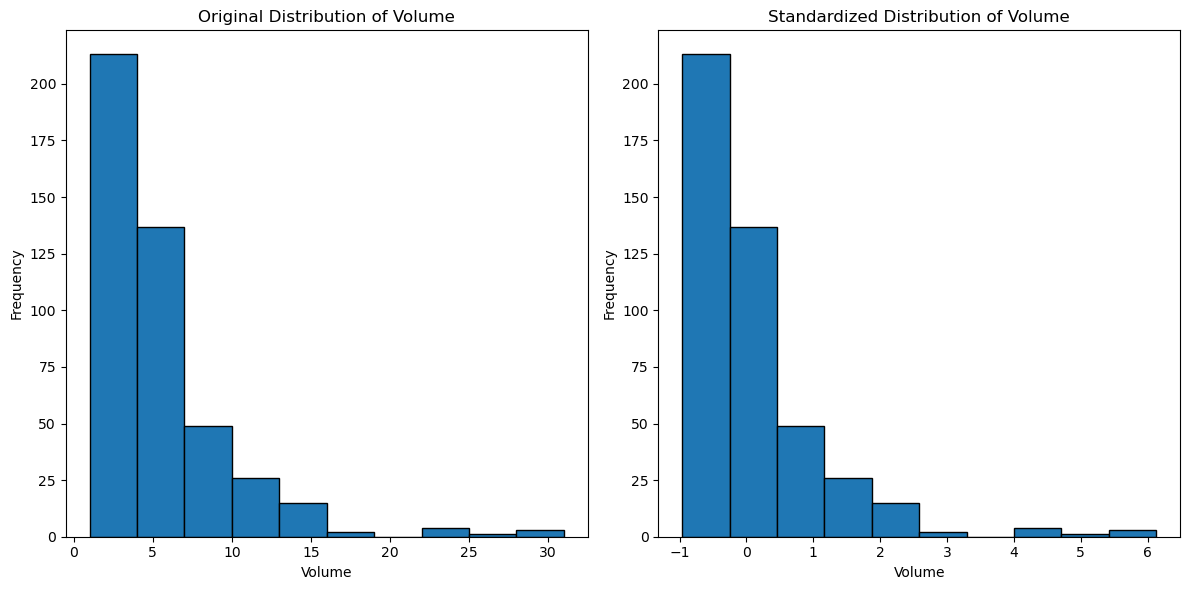

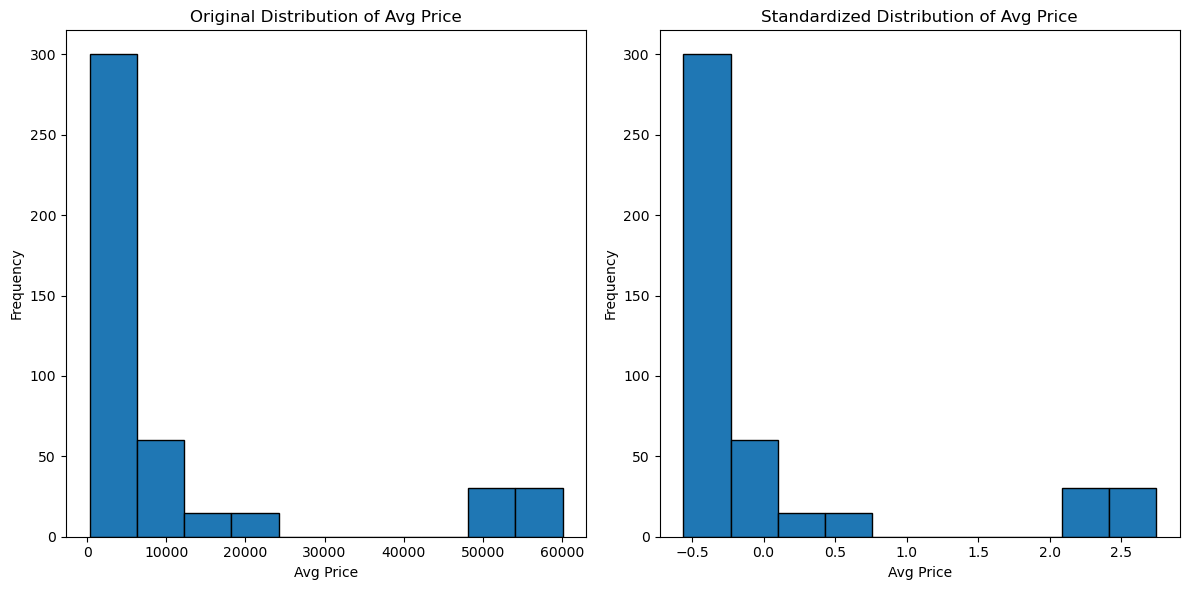

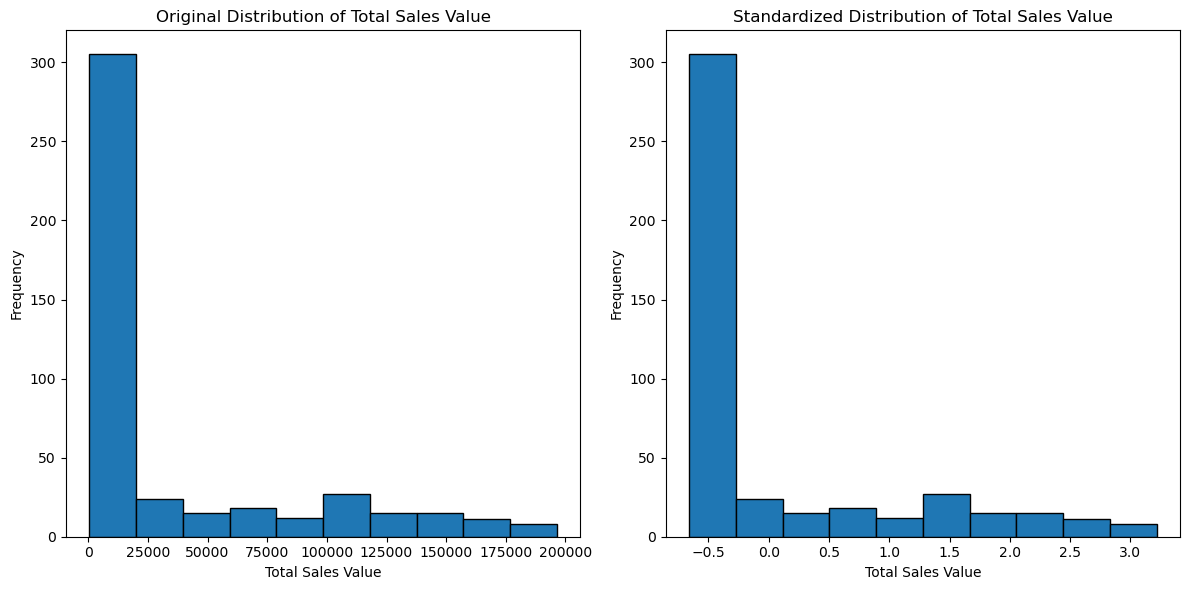

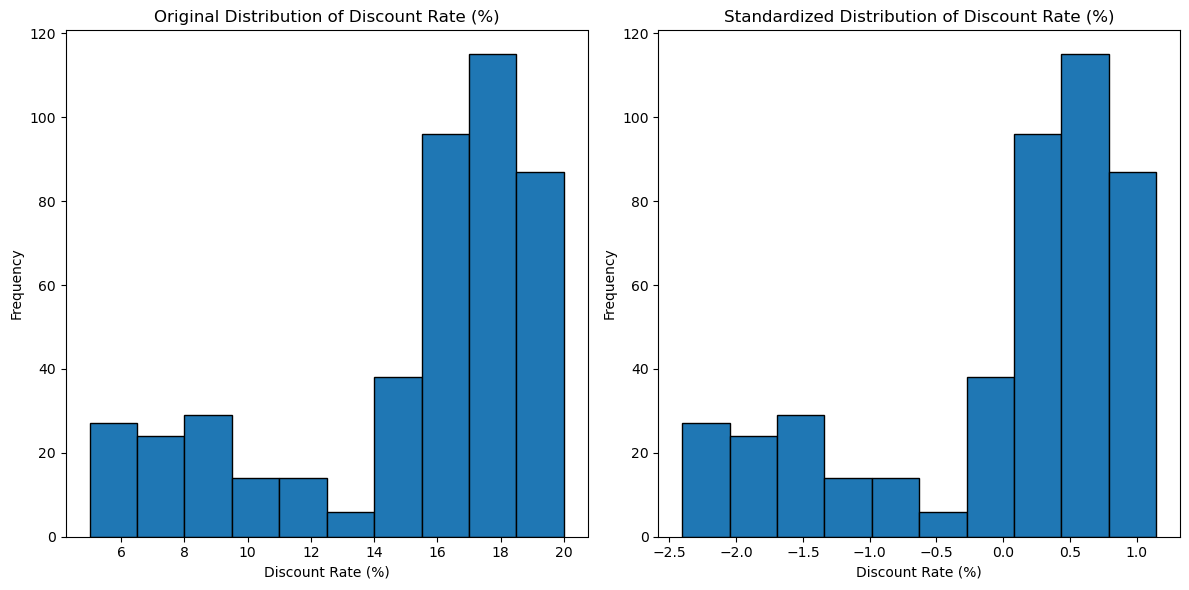

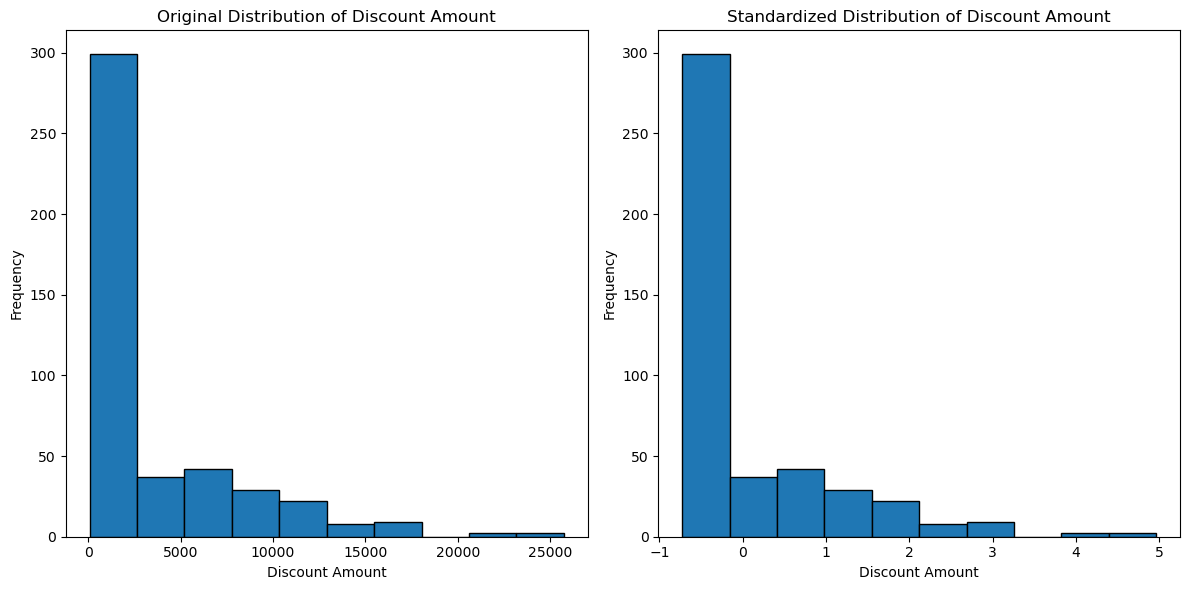

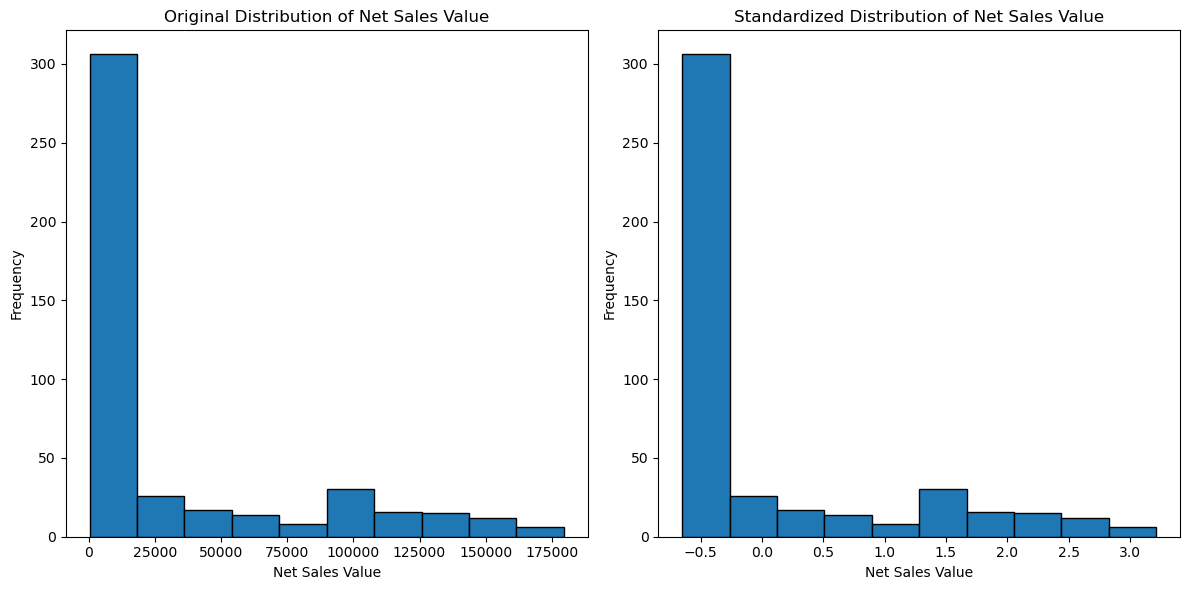

Original Data:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.

In [103]:
# prompt: Numerical Variables
# ●Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
# ●Steps:
# Explain the concept of standardization (z-score normalization).
# Standardize the numerical columns using the formula: z=x-mu/sigma
# ​Show before and after comparisons of the data distributions.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df and numerical_cols are defined from previous code cells
def standardize_data(df, num_cols):
    """Standardizes numerical columns in a DataFrame using z-score normalization."""
    
    df_standardized = df.copy()  # Create a copy to avoid modifying the original DataFrame
    
    for col in num_cols:
        # Calculate mean and standard deviation for each column
        mean = df[col].mean()
        std_dev = df[col].std()
        
        # Standardize using z-score formula
        if std_dev !=0:
          df_standardized[col] = (df[col] - mean) / std_dev

    return df_standardized

# Example Usage (assuming 'df' is your DataFrame and 'numerical_cols' is a list of numerical column names):
df_standardized = standardize_data(df, num_cols)

# Compare before and after distributions using histograms
for col in num_cols:
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.hist(df[col], bins=10, edgecolor='k')
  plt.title(f'Original Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  plt.hist(df_standardized[col], bins=10, edgecolor='k')
  plt.title(f'Standardized Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  plt.tight_layout()  # Adjust subplot parameters for a tight layout
  plt.show()

# Display descriptive statistics for original and standardized data
print("Original Data:")
print(df[num_cols].describe())

print("\nStandardized Data:")
print(df_standardized[num_cols].describe())

#Conversion of Categorical Data into Dummy Variables

In [105]:
# prompt: ●To transform categorical variables into a format that can be provided to ML algorithms.
# ●Steps:
# Discuss the need for converting categorical data into dummy variables (one-hot encoding).
# Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
# Display a portion of the transformed dataset.

# Assuming df is your DataFrame and categorical_cols are identified

# Import necessary libraries
import pandas as pd

# Identify categorical columns (if not already done)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display a portion of the transformed dataset
print(df_encoded.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...